# Equipe 7:
- Gabriel Lenon Barros da Silva (glbs@cesar.school)
- Bruno Venceslau Barbosa (bvb@cesar.school)
- Carolina Queiroz de Sousa (cqs@cesar.school)
- Gustavo Miguel Ferreira da Silva (gmfs@cesar.school)
- Pedro Henrique de Amaral lira (phal@cesar.school)

# Análise Exploratória de Dados (EDA)

O objetivo deste estudo é aplicar transformações, normalizações e análises descritivas e estatísticas dos dados. Por fim, é preciso que seja feita uma conclusão do estudo realizado.

Base de dados utilizada: Titanic
1. Carregamento de dados
2. Análise dos dados
3. Transformação dos dados (categoricos/binarização)
2. Remoção de campos desnecessários (nome, id, ticket, cabine)
4. Tratamento de dados nulos e/ou faltantes
5. Separação dos dados, holdout
6. Normalização dos dados

## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Obtenha os dados
** Leia o arquivo csv 'titanic.csv' em um DataFrame **

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')

** Verifique o cabeçalho do DataFrame.**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Transformação dos dados (categoricos/binarização)

## Categorização

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(df['Sex'])

LabelEncoder()

In [ ]:
df['Sex_le'] = le.transform(df['Sex'])

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_le
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## Binarização

In [ ]:
df_embarked = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df_embarked[['Embarked_Q', 'Embarked_S']] = df_embarked[['Embarked_Q', 'Embarked_S']].astype(int)
display(df_embarked.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_le,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,1


In [ ]:
df_embarked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Sex_le       891 non-null    int64  
 12  Embarked_Q   891 non-null    int64  
 13  Embarked_S   891 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 97.6+ KB


# Remoção de campos desnecessários (PassengerId, Name, Ticket, Cabin)

In [ ]:
df_embarked.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [ ]:
display(df_embarked.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_le,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,1,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,1,0,1


# Tratamento de dados nulos e/ou faltantes

Describe

In [ ]:
df_embarked.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_Q,Embarked_S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


Male

In [ ]:
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 1) & (df_embarked.Sex_le == 'male'), 'Age'] = df_embarked[df_embarked.Pclass == 1 & (df_embarked.Sex_le == 'male')].Age.median()
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 2) & (df_embarked.Sex_le == 'male'), 'Age'] = df_embarked[df_embarked.Pclass == 2 & (df_embarked.Sex_le == 'male')].Age.median()
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 3) & (df_embarked.Sex_le == 'male'), 'Age'] = df_embarked[df_embarked.Pclass == 3 & (df_embarked.Sex_le == 'male')].Age.median()

Female

In [ ]:
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 1) & (df_embarked.Sex_le == 'female'), 'Age'] = df_embarked[df_embarked.Pclass == 1 & (df_embarked.Sex_le == 'female')].Age.median()
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 2) & (df_embarked.Sex_le == 'female'), 'Age'] = df_embarked[df_embarked.Pclass == 2 & (df_embarked.Sex_le == 'female')].Age.median()
df_embarked.loc[df_embarked.Age.isna() & (df_embarked.Pclass == 3) & (df_embarked.Sex_le == 'female'), 'Age'] = df_embarked[df_embarked.Pclass == 3 & (df_embarked.Sex_le == 'female')].Age.median()

Removendo os dados nulos remanencentes

In [ ]:
df_embarked.dropna(inplace=True)

In [ ]:
df_embarked.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Pclass      714 non-null    int64  
 2   Sex         714 non-null    object 
 3   Age         714 non-null    float64
 4   SibSp       714 non-null    int64  
 5   Parch       714 non-null    int64  
 6   Fare        714 non-null    float64
 7   Sex_le      714 non-null    int64  
 8   Embarked_Q  714 non-null    int64  
 9   Embarked_S  714 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 61.4+ KB


# Separação dos dados, holdout

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

Removendo a coluna Sex pois não será utilizada para treinar o modelo

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_embarked.drop(columns=['Sex_le', 'Survived', 'Sex'])
y = df_embarked['Survived']

In [ ]:
df_embarked.drop(columns=['Sex_le', 'Survived', 'Sex'], inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [ ]:
pd.DataFrame(X_train)

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
467,1,56.0,0,0,26.5500,0,1
6,1,54.0,0,0,51.8625,0,1
858,3,24.0,0,3,19.2583,0,0
478,3,22.0,0,0,7.5208,0,1
424,3,18.0,1,1,20.2125,0,1
...,...,...,...,...,...,...,...
147,3,9.0,2,2,34.3750,0,1
400,3,39.0,0,0,7.9250,0,1
853,1,16.0,0,1,39.4000,0,1
342,2,28.0,0,0,13.0000,0,1


# Normalização dos dados

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

Converta as variáveis independentes com o StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
display(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,-1.486907,1.835271,-0.540141,-0.511285,-0.140041,-0.193448,0.534867
1,-1.486907,1.696361,-0.540141,-0.511285,0.375660,-0.193448,0.534867
2,0.898838,-0.387292,-0.540141,3.048685,-0.288598,-0.193448,-1.869624
3,0.898838,-0.526202,-0.540141,-0.511285,-0.527731,-0.193448,0.534867
4,0.898838,-0.804023,0.533685,0.675372,-0.269158,-0.193448,0.534867


Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
age_test_scaled = scaler.transform(X_test)
display(pd.DataFrame(age_test_scaled, columns=X_test.columns).head())

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,-0.294035,0.307259,0.533685,-0.511285,-0.253114,-0.193448,0.534867
1,0.898838,-0.526202,-0.540141,-0.511285,-0.516949,-0.193448,0.534867
2,-0.294035,-0.456747,-0.540141,-0.511285,-0.467034,-0.193448,0.534867
3,-0.294035,0.029438,-0.540141,-0.511285,-0.416101,-0.193448,0.534867
4,0.898838,0.862899,-0.540141,-0.511285,-0.504470,-0.193448,0.534867


In [ ]:
age_scaler = StandardScaler()

age_train_scaled = age_scaler.fit_transform(X_train[['Age']])
display(pd.DataFrame(age_train_scaled, columns=['Age_scaled']).head())

,Age_scaled
0,1.835271
1,1.696361
2,-0.387292
3,-0.526202
4,-0.804023


In [ ]:
fare_scaler = StandardScaler()
X_train_fare_scaled = fare_scaler.fit_transform(X_train[['Fare']])
display(X_train_fare_scaled[:10])

array([[-0.14004125],
       [ 0.37566032],
       [-0.28859794],
       [-0.52773067],
       [-0.26915764],
       [-0.52306108],
       [-0.52042884],
       [-0.35701791],
       [-0.41610076],
       [-0.41610076]])

In [ ]:
X_train_fare_scaled[:10]

array([[-0.14004125],
       [ 0.37566032],
       [-0.28859794],
       [-0.52773067],
       [-0.26915764],
       [-0.52306108],
       [-0.52042884],
       [-0.35701791],
       [-0.41610076],
       [-0.41610076]])

In [ ]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
467,1,56.0,0,0,26.5500,0,1
6,1,54.0,0,0,51.8625,0,1
858,3,24.0,0,3,19.2583,0,0
478,3,22.0,0,0,7.5208,0,1
424,3,18.0,1,1,20.2125,0,1
...,...,...,...,...,...,...,...
147,3,9.0,2,2,34.3750,0,1
400,3,39.0,0,0,7.9250,0,1
853,1,16.0,0,1,39.4000,0,1
342,2,28.0,0,0,13.0000,0,1


In [ ]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
405,2,34.0,1,0,21.0000,0,1
112,3,22.0,0,0,8.0500,0,1
398,2,23.0,0,0,10.5000,0,1
747,2,30.0,0,0,13.0000,0,1
349,3,42.0,0,0,8.6625,0,1
...,...,...,...,...,...,...,...
123,2,32.5,0,0,13.0000,0,1
782,1,29.0,0,0,30.0000,0,1
668,3,43.0,0,0,8.0500,0,1
627,1,21.0,0,0,77.9583,0,1


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 467 to 111
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      499 non-null    int64  
 1   Age         499 non-null    float64
 2   SibSp       499 non-null    int64  
 3   Parch       499 non-null    int64  
 4   Fare        499 non-null    float64
 5   Embarked_Q  499 non-null    int64  
 6   Embarked_S  499 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 31.2 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 405 to 148
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      215 non-null    int64  
 1   Age         215 non-null    float64
 2   SibSp       215 non-null    int64  
 3   Parch       215 non-null    int64  
 4   Fare        215 non-null    float64
 5   Embarked_Q  215 non-null    int64  
 6   Embarked_S  215 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.4 KB


Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou.

In [ ]:
fare_scaler.inverse_transform(df_embarked[['Fare']].head(5))

array([[ 389.27997656],
       [3532.26614192],
       [ 422.41142006],
       [2639.76395414],
       [ 428.54687257]])

# Adicione a conclusão obtida no estudo realizado

## Dados incompletos

Identificamos que as colunas **Age** (714 registros), **Cabin** (204 registros) e **Embarked** (889) possuem dados incompletos se comparadas as outras colunas do dataset, as quais possuem 891 registros.

Para tratá-las, o seguinte foi feito:
- Foi utilizada binarização em **Embarked**, de modo a informar a presença ou não dessa informação em cada linha.
- **Cabin** foi **removida** por não ser relevante para nossa análise.
- Foi utilizada a **mediana** (separando os dados pelos sexos Male e Female) para preencher os valores ausentes em **Age**, uma vez que os seus dados seguem uma distribuição que tende a uma normal.

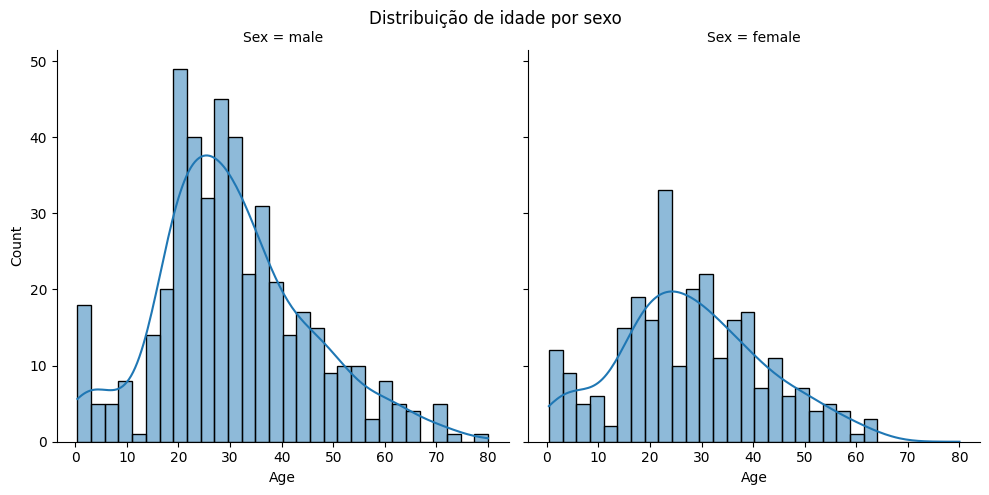

In [ ]:
sns.displot(df, x='Age', col='Sex', kde=True, bins=30)

plt.suptitle('Distribuição de idade por sexo')
plt.subplots_adjust(top=0.9)

plt.show()

## Dados normalizados buscam diminuir pesos e ruídos em variáveis com intervalos muito grandes

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
print(f"Intervalo de Fare em X_train: [{X_train['Fare'].min()}, {X_train['Fare'].max()}] ")

Intervalo de Fare em X_train: [0.0, 512.3292] 


In [ ]:
print(f"Intervalo de Fare_scaled em X_train_scaled: [{X_train_scaled_df['Fare'].min()}, {X_train_scaled_df['Fare'].max()}] ")

Intervalo de Fare_scaled em X_train_scaled: [-0.6809548980752502, 9.756930487461375] 


Tomando como exemplo a variável **Fare**, olhando para o conjunto de Treino, é possível visualizar que seu range original era de [0.0, 512.3292] e, ao normalizar, se tornou [-0.6809548980752502, 9.756930487461375].

Vale notar que o intervalo, após normalização, mostra que **Fare** possui alguns valores muito distantes da média, e é possível visualizar isso abaixo com uma distribuição muito parecida com a exponencial e a log-normal, indicando que a maioria dos passageiros compraram passagens de baixo valor, e poucos passageiros compraram passagens de alto valor (calda longa à direita).

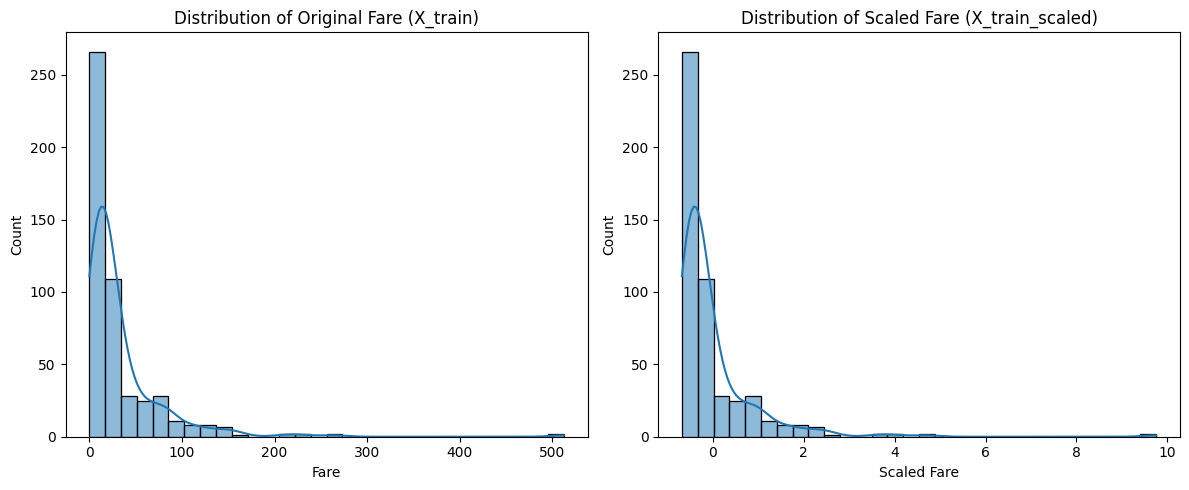

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(X_train['Fare'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribution of Original Fare (X_train)')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')

sns.histplot(X_train_scaled_df['Fare'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribution of Scaled Fare (X_train_scaled)')
axes[1].set_xlabel('Scaled Fare')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

A natureza de uma variável como **Fare** indica que, por conta da assimetria dos seus valores, poderia ser interessante utilizar uma transformação logarítmica antes de normalizar os dados, para se obter melhores resultados em uma próxima etapa de aplicação de um algoritmo de ML.

## Uso do método Holdout para separação em dados de treino e de teste

Após aplicar o método Holdout, os dados foram separados do seguinte modo:
- Treino: 70% -> 499 registros
- Teste: 30% -> 215 registros

Essa separação é muito útil para avaliar a capacidade de generalização do modelo de ML a ser desenvolvido.